In [ ]:
#Aim: Implementation of Image Compression using Huffman Coding Algorithm.
#Hasshya Shah
#C082
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread('pic1.jpg')

In [ ]:
new_width = 256
new_height = 256

# Resize the image
resized_image = cv2.resize(image, (new_width, new_height))

In [ ]:
# Converting image to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

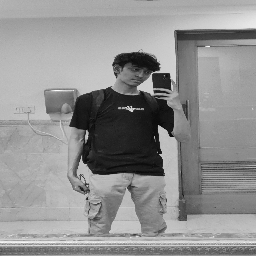

In [ ]:
cv2_imshow(gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
gray_image

array([[178, 180, 180, ..., 179, 176, 179],
       [176, 183, 173, ..., 178, 177, 179],
       [179, 178, 179, ..., 180, 179, 181],
       ...,
       [ 95, 104, 108, ...,  95,  94,  87],
       [ 94, 103, 101, ..., 117, 113, 120],
       [136, 142, 150, ..., 146, 146, 146]], dtype=uint8)

In [ ]:
freq_dict = {}

for i in range(len(gray_image)):
  for j in range(len(gray_image)):
    if str(gray_image[i][j]) in freq_dict.keys():
      freq_dict[str(gray_image[i][j])] += 1
    else:
      freq_dict[str(gray_image[i][j])] = 1

In [ ]:
freq_dict

{'178': 745,
 '180': 708,
 '181': 738,
 '174': 846,
 '177': 695,
 '179': 734,
 '175': 850,
 '176': 764,
 '173': 948,
 '172': 1031,
 '171': 1127,
 '170': 1191,
 '169': 1199,
 '168': 1073,
 '167': 961,
 '166': 919,
 '162': 815,
 '164': 831,
 '165': 832,
 '157': 705,
 '155': 529,
 '147': 363,
 '148': 356,
 '151': 351,
 '154': 435,
 '149': 352,
 '144': 374,
 '150': 375,
 '145': 315,
 '141': 303,
 '114': 257,
 '111': 212,
 '113': 267,
 '116': 309,
 '121': 344,
 '120': 359,
 '152': 398,
 '161': 716,
 '159': 724,
 '183': 887,
 '163': 822,
 '160': 699,
 '184': 959,
 '182': 771,
 '188': 1254,
 '185': 1080,
 '189': 1177,
 '187': 1179,
 '190': 939,
 '186': 1199,
 '191': 726,
 '197': 444,
 '195': 464,
 '194': 404,
 '196': 456,
 '193': 454,
 '200': 173,
 '198': 329,
 '192': 518,
 '199': 253,
 '201': 163,
 '202': 136,
 '203': 160,
 '204': 179,
 '206': 161,
 '205': 211,
 '207': 112,
 '208': 80,
 '209': 64,
 '210': 69,
 '213': 63,
 '212': 62,
 '214': 81,
 '215': 68,
 '211': 57,
 '216': 55,
 '217': 51,

In [ ]:
len(freq_dict)

242

In [ ]:
sum(freq_dict.values())

65536

In [ ]:
sorted_freq = {key: val for key, val in sorted(freq_dict.items(), key = lambda item: item[1])}

In [ ]:
sorted_freq

{'253': 1,
 '247': 1,
 '252': 2,
 '248': 2,
 '245': 2,
 '243': 2,
 '235': 3,
 '237': 3,
 '251': 3,
 '239': 3,
 '242': 3,
 '241': 4,
 '246': 4,
 '244': 5,
 '234': 7,
 '238': 7,
 '10': 7,
 '240': 7,
 '233': 8,
 '236': 10,
 '11': 16,
 '232': 21,
 '228': 25,
 '230': 26,
 '231': 27,
 '226': 28,
 '229': 28,
 '227': 31,
 '48': 34,
 '74': 34,
 '52': 35,
 '225': 37,
 '53': 37,
 '49': 37,
 '46': 38,
 '224': 40,
 '12': 40,
 '51': 41,
 '218': 42,
 '222': 42,
 '50': 44,
 '223': 45,
 '54': 45,
 '81': 45,
 '73': 46,
 '77': 46,
 '45': 46,
 '44': 47,
 '220': 48,
 '79': 48,
 '55': 48,
 '85': 49,
 '78': 49,
 '217': 51,
 '219': 51,
 '86': 51,
 '75': 52,
 '57': 52,
 '82': 52,
 '221': 53,
 '80': 54,
 '71': 54,
 '216': 55,
 '76': 55,
 '211': 57,
 '56': 58,
 '64': 59,
 '58': 60,
 '87': 60,
 '13': 61,
 '212': 62,
 '83': 62,
 '72': 62,
 '47': 62,
 '213': 63,
 '209': 64,
 '215': 68,
 '70': 68,
 '66': 68,
 '210': 69,
 '61': 69,
 '43': 69,
 '84': 70,
 '89': 71,
 '92': 72,
 '93': 73,
 '60': 73,
 '88': 75,
 '69': 75

In [ ]:
class NodeTree(object):
  def __init__(self, left=None, right=None):
      self.left = left
      self.right = right

  def children(self):
      return (self.left, self.right)

  def nodes(self):
      return (self.left, self.right)

  def __str__(self):
      return '%s_%s' % (self.left, self.right)


# Main function implementing huffman coding
def huffman_code_tree(node, left=True, binString=''):
  if type(node) is str:
      return {node: binString}
  (l, r) = node.children()
  d = dict()
  d.update(huffman_code_tree(l, True, binString + '0'))
  d.update(huffman_code_tree(r, False, binString + '1'))
  return d

In [ ]:
freq = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

nodes = freq

In [ ]:
nodes

[('188', 1254),
 ('169', 1199),
 ('186', 1199),
 ('170', 1191),
 ('187', 1179),
 ('189', 1177),
 ('171', 1127),
 ('185', 1080),
 ('168', 1073),
 ('172', 1031),
 ('167', 961),
 ('184', 959),
 ('173', 948),
 ('190', 939),
 ('166', 919),
 ('183', 887),
 ('175', 850),
 ('174', 846),
 ('165', 832),
 ('164', 831),
 ('163', 822),
 ('162', 815),
 ('182', 771),
 ('176', 764),
 ('178', 745),
 ('181', 738),
 ('179', 734),
 ('158', 727),
 ('191', 726),
 ('159', 724),
 ('161', 716),
 ('180', 708),
 ('157', 705),
 ('160', 699),
 ('177', 695),
 ('156', 663),
 ('155', 529),
 ('192', 518),
 ('195', 464),
 ('196', 456),
 ('193', 454),
 ('197', 444),
 ('154', 435),
 ('194', 404),
 ('152', 398),
 ('153', 393),
 ('118', 388),
 ('33', 379),
 ('30', 378),
 ('24', 376),
 ('150', 375),
 ('144', 374),
 ('29', 368),
 ('147', 363),
 ('117', 363),
 ('120', 359),
 ('26', 358),
 ('148', 356),
 ('149', 352),
 ('151', 351),
 ('34', 346),
 ('121', 344),
 ('27', 344),
 ('32', 344),
 ('119', 341),
 ('28', 341),
 ('125', 

In [ ]:
while len(nodes) > 1:
  (key1, c1) = nodes[-1]
  (key2, c2) = nodes[-2]
  nodes = nodes[:-2]
  node = NodeTree(key1, key2)
  nodes.append((node, c1 + c2))

  nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

huffmanCode = huffman_code_tree(nodes[0][0])

In [ ]:
print("Intensity | Huffman code ")
print("------------------------")

for (char, frequency) in freq:
  print(f"{char}\t | {huffmanCode[char]}")

Intensity | Huffman code 
------------------------
188	 | 110011
169	 | 110000
186	 | 101111
170	 | 101110
187	 | 101101
189	 | 101100
171	 | 101001
185	 | 100111
168	 | 100110
172	 | 100010
167	 | 011111
184	 | 011110
173	 | 011101
190	 | 011100
166	 | 011010
183	 | 010111
175	 | 010100
174	 | 010011
165	 | 010001
164	 | 010000
163	 | 001111
162	 | 001110
182	 | 001010
176	 | 001000
178	 | 000101
181	 | 000011
179	 | 000010
158	 | 000000
191	 | 1111111
159	 | 1111110
161	 | 1111011
180	 | 1111001
157	 | 1111000
160	 | 1110110
177	 | 1110101
156	 | 1101111
155	 | 1001001
192	 | 1000110
195	 | 0110110
196	 | 0110010
193	 | 0110001
197	 | 0101101
154	 | 0101011
194	 | 0011010
152	 | 0011001
153	 | 0010111
118	 | 0010110
33	 | 0010010
30	 | 0001111
24	 | 0001110
150	 | 0001101
144	 | 0001001
29	 | 0001000
147	 | 0000010
117	 | 11111011
120	 | 11111010
26	 | 11111000
148	 | 11110101
149	 | 11101111
151	 | 11101110
34	 | 11101001
121	 | 11101000
27	 | 11100111
32	 | 11100110
119	 | 11100101

In [ ]:
total_bits = 0

for i in sorted_freq.keys():
  bits = 8*sorted_freq[i]
  total_bits += bits

# Total bits before huffman encoding
total_bits

524288

In [ ]:
total_bits_huff = 0

for i in sorted_freq.keys():
  bits = len(huffmanCode[i])*sorted_freq[i]
  total_bits_huff += bits

# Total bits after huffman encoding
total_bits_huff

471667

In [ ]:
print("Bits before huffman coding:", total_bits)
print("Bits after huffman coding:", total_bits_huff)

Bits before huffman coding: 524288
Bits after huffman coding: 471667


In [ ]:
print("Compression Ratio: ", total_bits/total_bits_huff)

Compression Ratio:  1.1115638787534425
